In [57]:
import math

import cufflinks as cf
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from IPYNBrenderer import render_google_doc
from tensorflow import keras

cf.go_offline()
import warnings

warnings.filterwarnings('ignore')

# Batch normalization

### forward pass 
step 1
$$ \ μ_B = \frac{1}{m_B} \sum_{i=1}^{m_B} \ x^(i)

step2
$$ \ σ_B^2 = \frac{1}{m_B} \sum_{i=1}^{m_B} ( \ x^(i) - μ_B )^2


step 3
$$ \hat{x}^(i) =\frac{ x^(i) - μ_B}{\sqrt{σ_B^2+ \epsilon}}

step 4
$$ z^(i) = \gamma \cdot \hat{x}^(i) + \beta

In [128]:
class BatchNormalization:
    def __init__(self, gamma=1, beta=0, eps=1e-5):
        """ gamma: scale parameter beta: shift parameter eps: small value for numerical stability """
        self.gamma = gamma
        self.beta = beta
        self.eps = eps
        self.running_mean = 0
        self.running_var = 0
        self.batch_mean = 0
        self.batch_var = 0
        self.batch_size = 0
        self.x = 0
        self.x_norm = 0

    def forward(self, x, is_training=True):
        self.batch_size = x.shape[0]
        self.x = x
        if is_training:
            self.batch_mean =  np.mean(x, axis=0)
            self.batch_var =  np.var(x, axis=0)
            self.running_mean = 0.9 * self.running_mean + 0.1 * self.batch_mean
            self.running_var = 0.9 * self.running_var + 0.1 * self.batch_var
        else:
            self.batch_mean = self.running_mean
            self.batch_var = self.running_var
        self.x_norm = (x - self.batch_mean) / np.sqrt(self.batch_var + self.eps)
        out = self.gamma * self.x_norm + self.beta
        return out



In [124]:
X = np.random.random((1000, 100)) # 100 data points, each with dimension 100

In [125]:

model = BatchNormalization()
dout = model.forward(X , is_training=True)

In [126]:
model.__dict__

{'gamma': 1,
 'beta': 0,
 'eps': 1e-05,
 'running_mean': array([0.05035208, 0.05097212, 0.05007515, 0.04981404, 0.05042691,
        0.0511019 , 0.04942713, 0.05013928, 0.04998559, 0.04974981,
        0.04972245, 0.04998465, 0.05118949, 0.05085486, 0.0489048 ,
        0.0504698 , 0.0509284 , 0.05054047, 0.05034749, 0.05140229,
        0.05105852, 0.05107165, 0.0509534 , 0.04960026, 0.04907431,
        0.05125169, 0.05078993, 0.0501184 , 0.04992207, 0.04887544,
        0.04809139, 0.05045866, 0.04990419, 0.04983088, 0.05077204,
        0.05051663, 0.05122583, 0.04960907, 0.0513524 , 0.04874902,
        0.04877277, 0.04782025, 0.05009455, 0.04852034, 0.04914211,
        0.05029722, 0.0499874 , 0.04921957, 0.04829584, 0.05039931,
        0.05011812, 0.04940275, 0.0511984 , 0.0498723 , 0.04987829,
        0.05290918, 0.04844704, 0.05075474, 0.04999476, 0.05125149,
        0.04923647, 0.04993654, 0.04970353, 0.04829893, 0.04982466,
        0.04974458, 0.0498152 , 0.04885497, 0.05071359, 0.05

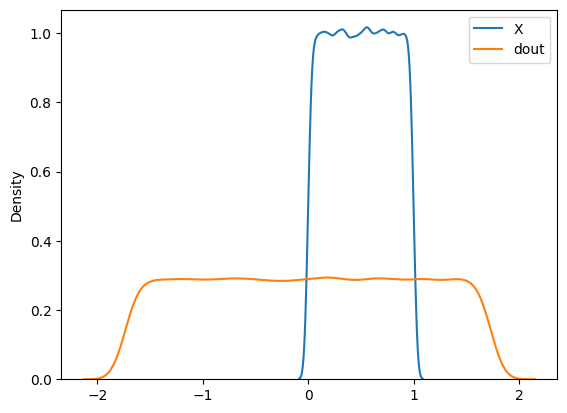

In [127]:
sns.distplot(X, label='X' , hist=False)
sns.distplot(dout, label='dout' , hist=False)
plt.legend( loc='upper right')

In [29]:
# step 1 
X = np.random.random((100, 1))
df = pd.DataFrame(X, columns = ['X'])

In [30]:
df.iplot()

In [37]:
BATCH_MEAN = np.mean(X)
# STEP 2
BATCH_VAR = np.var(X)

In [38]:
BATCH_MEAN , BATCH_VAR

(0.5080182402810933, 0.08424317306834761)

In [42]:
EPSILON = 1e-8

In [43]:
# step 3

df['X_norm'] = (df['X'] - BATCH_MEAN) / math.sqrt(BATCH_VAR + EPSILON)

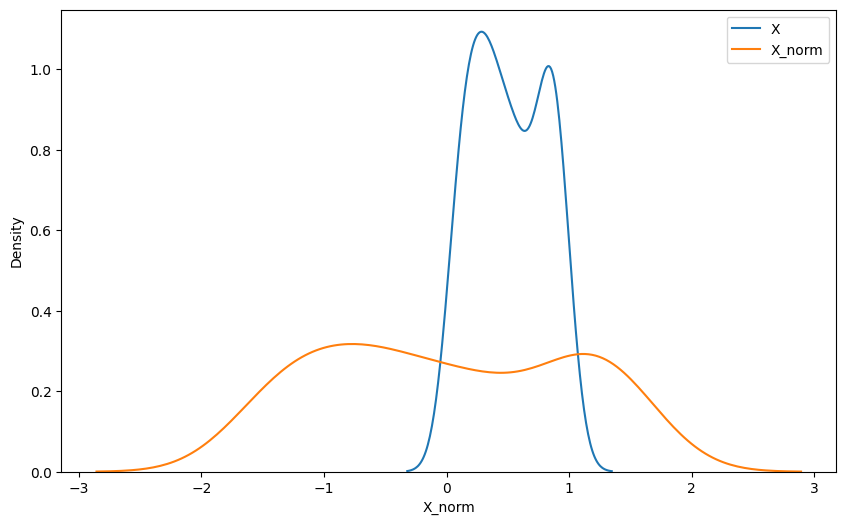

In [62]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df["X"] , hist=False ,  label= "X")
sns.distplot(df["X_norm"] , hist=False , label= "X_norm")
plt.legend(labels = ['X', 'X_norm'])
plt.show()


In [64]:
df["gamma"] = 0.7 * df["X_norm"]

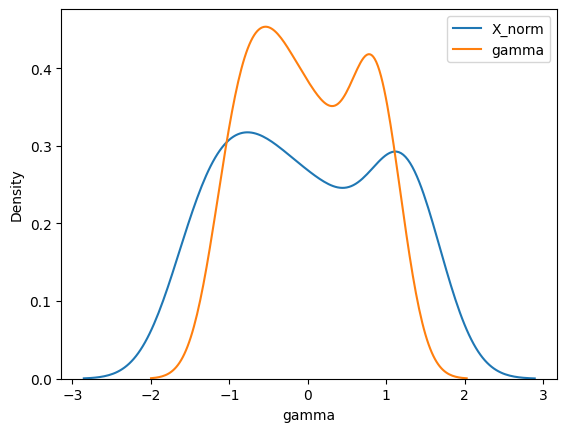

In [66]:
sns.distplot(df["X_norm"] , hist=False , label= "X_norm")
sns.distplot(df["gamma"] , hist=False , label= "gamma")
plt.legend(labels = ['X_norm', 'gamma'])

In [67]:
df["beta"] = 0.3 + df["gamma"]

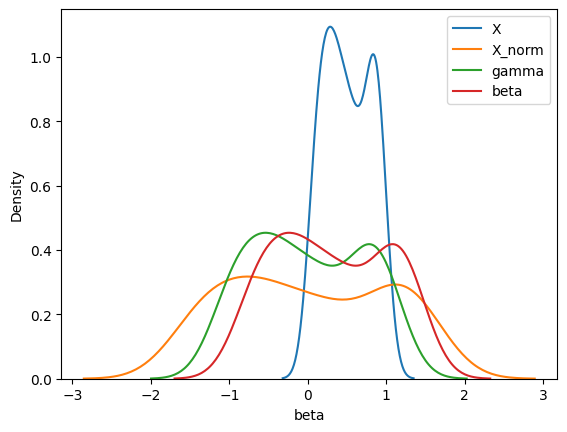

In [69]:
sns.distplot(df["X"] , hist=False , label= "gamma")
sns.distplot(df["X_norm"] , hist=False , label= "beta")
sns.distplot(df["gamma"] , hist=False , label= "gamma")
sns.distplot(df["beta"] , hist=False , label= "beta")
plt.legend(labels = ['X', 'X_norm', 'gamma', 'beta'])